In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import matplotlib.colors as mcolors
import matplotlib.cm as cm

import pandas as pd

In [2]:
data_path = '../DATA/results'

files = [
    'Halo_11_Arm1_widths_Oct10.csv',
    'Halo_11_Arm2_widths_Oct10.csv',
    'Halo_17_Arm1_widths_Oct10.csv',
    'Halo_17_Arm2_widths_Oct10.csv',
    'Halo_198185_Arm1_widths_Oct10.csv',
    'Halo_198185_Arm2_widths_Oct10.csv',
    'Halo_418336_Arm1_widths_Oct10.csv',
    'Halo_418336_Arm2_widths_Oct10.csv',
    'Halo_167397_Arm1_widths_Oct10.csv',
    'Halo_167397_Arm2_widths_Oct10.csv',
    'Halo_117260_Arm1_widths_Oct10.csv',
    'Halo_117260_Arm2_widths_Oct10.csv',
]

dataframes = []

for file in files:
    halo_id, arm = file.split('_')[1], file.split('_')[2][3]  # e.g., '11' y '1' de 'Halo_11_Arm1'
    
    df = pd.read_csv(os.path.join(data_path, file))
    
    df['halo_id'] = int(halo_id)
    df['arm'] = int(arm)
    
    df = df[['halo_id', 'arm', 'amplitude', 'center', 'delta', 'fractured', 'gamma', 'id_tracing', 
             'sigma', 'stderr_amplitude', 'stderr_center', 'stderr_gamma', 'stderr_sigma', 'x', 
             'x_tracing', 'y', 'y_tracing', 'r_tracing', 'width_info', 'x_max', 'y_max', 'w1', 'w2', 'arm_length']]
    
    dataframes.append(df)

all_data = pd.concat(dataframes, ignore_index=True)

#print(all_data.head())


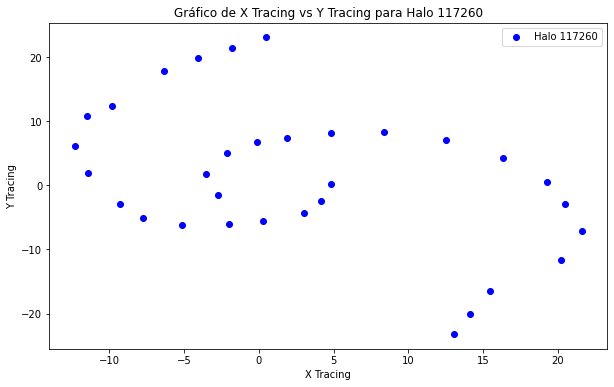

In [3]:
halo_id = 117260
halo_data = all_data[all_data['halo_id'] == halo_id]

x_tracing_coords = halo_data['x_tracing'].values
y_tracing_coords = halo_data['y_tracing'].values

plt.figure(figsize=(10, 6))
plt.scatter(x_tracing_coords, y_tracing_coords, marker='o', color='blue', label=f'Halo {halo_id}')

plt.xlabel('X Tracing')
plt.ylabel('Y Tracing')
plt.title(f'Gráfico de X Tracing vs Y Tracing para Halo {halo_id}')
plt.legend()
plt.show()


/home/daniel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/daniel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


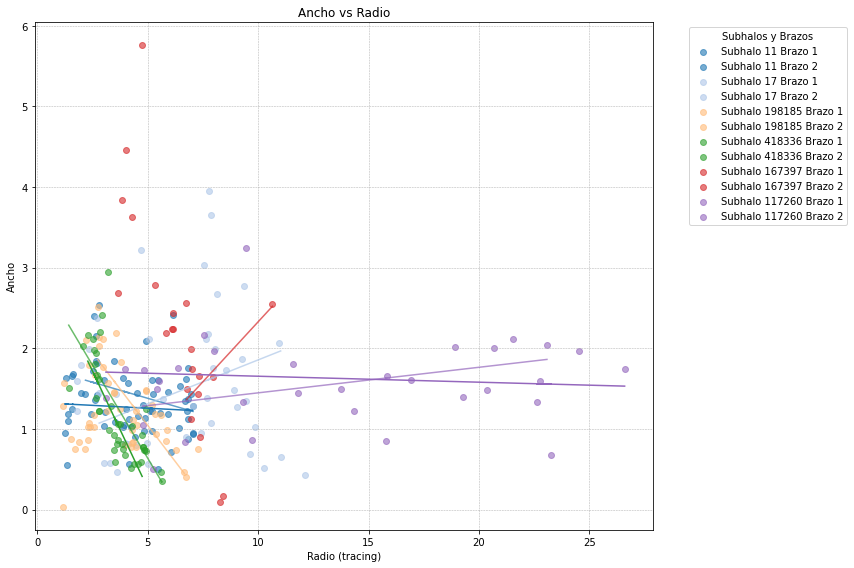

In [4]:
halo_ids = all_data['halo_id'].unique()
colors = cm.tab20(np.linspace(0, 0.4, len(halo_ids)))  

plt.figure(figsize=(12, 8))

# Iterar sobre cada subhalo y luego cada brazo
for i, halo_id in enumerate(halo_ids):

    halo_data = all_data[all_data['halo_id'] == halo_id]
    
    color_arm1 = colors[i]
    color_arm2 = mcolors.to_rgba(colors[i], alpha=0.7)  

    for arm, color in zip([1, 2], [color_arm1, color_arm2]):
        
        arm_data = halo_data[halo_data['arm'] == arm]
        arm_data['radius_tracing'] = np.sqrt(arm_data['x_tracing']**2 + arm_data['y_tracing']**2)
        arm_data['w_sum'] = arm_data['w1'] + arm_data['w2']
        
        radii_tracing = arm_data['radius_tracing'].values
        w_sums = arm_data['w_sum'].values
        
        slope, intercept, _, _, _ = linregress(radii_tracing, w_sums)
        
        plt.scatter(radii_tracing, w_sums, color=color, label=f'Subhalo {halo_id} Brazo {arm}', alpha=0.6)
        plt.plot(radii_tracing, intercept + slope * radii_tracing, color=color, linestyle='-')

# Configurar el estilo de la gráfica
plt.xlabel('Radio (tracing)')
plt.ylabel('Ancho')
plt.title('Ancho vs Radio')
plt.legend(title='Subhalos y Brazos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()



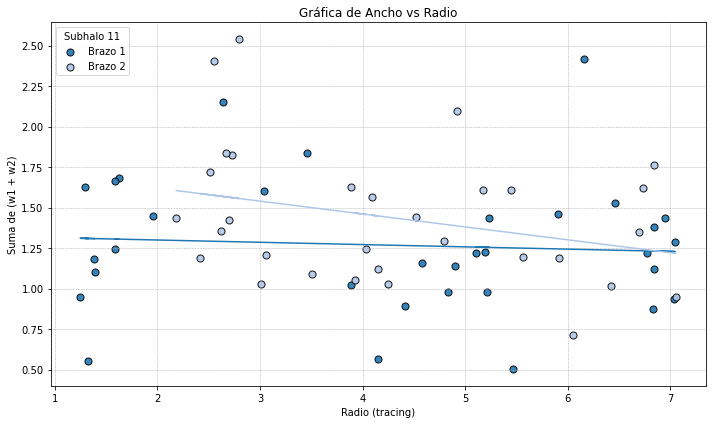

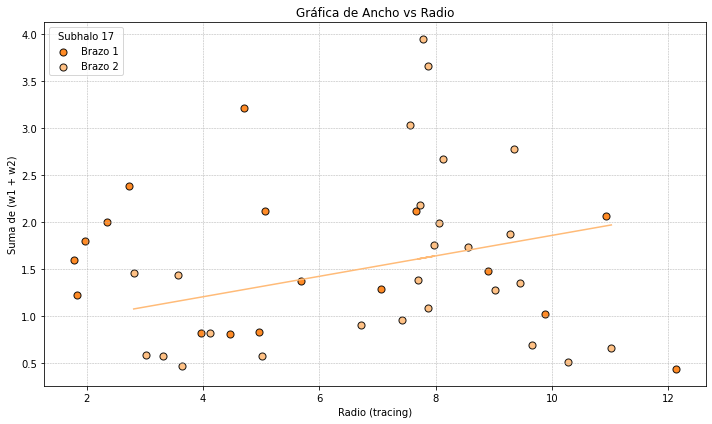

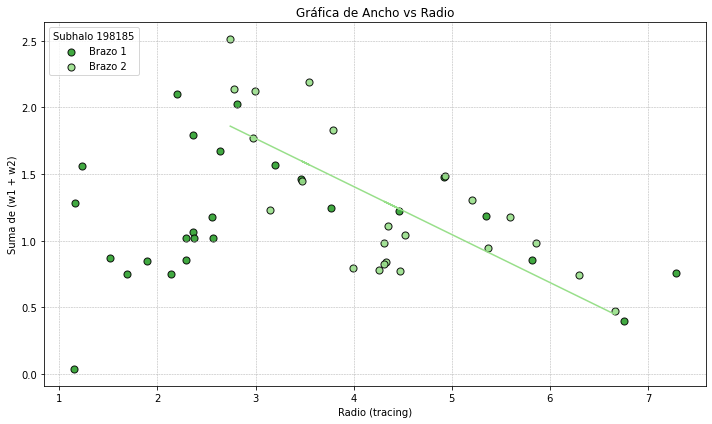

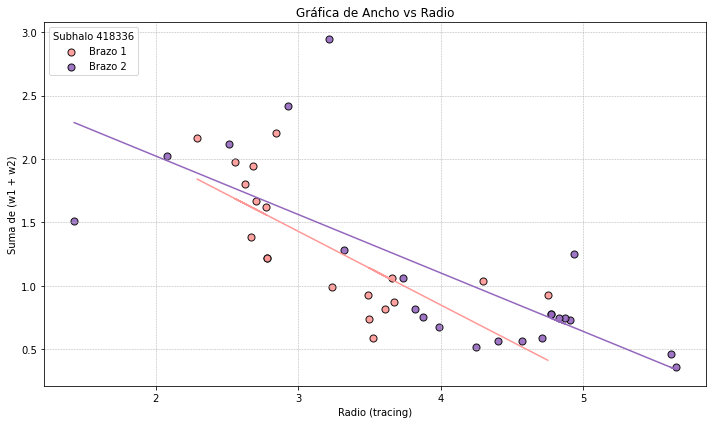

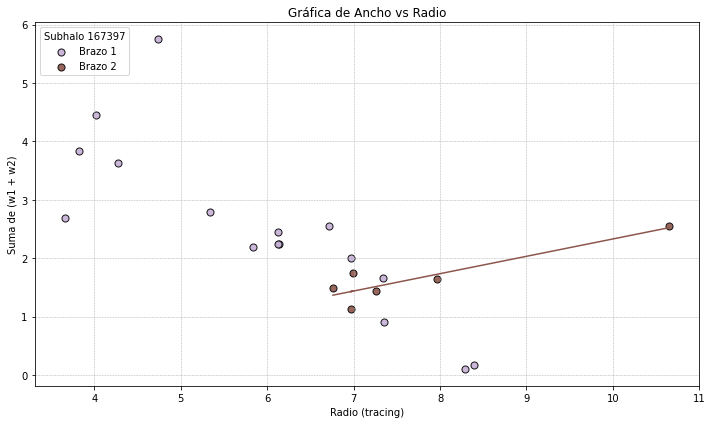

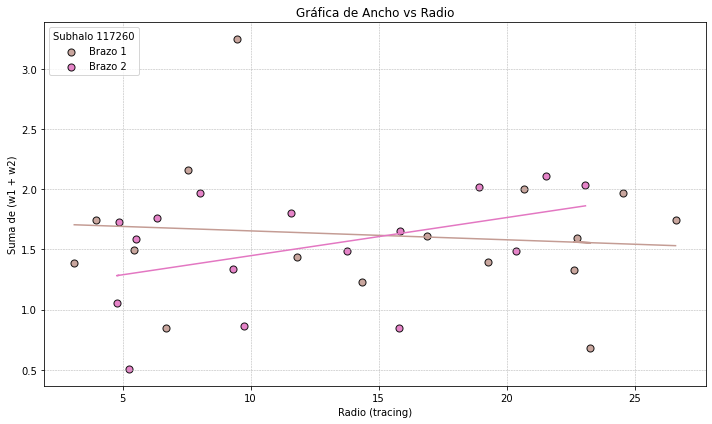

In [5]:
halo_ids = all_data['halo_id'].unique()
colors = cm.tab20(np.linspace(0, 1, len(halo_ids) * 3))  

for i, halo_id in enumerate(halo_ids):

    halo_data = all_data[all_data['halo_id'] == halo_id].copy()
    
    color_arm1 = colors[i * 2]     # Color para el brazo 1
    color_arm2 = colors[i * 2 + 1] # Color distinto para el brazo 2

    plt.figure(figsize=(10, 6))

    # Iterar sobre cada brazo (1 y 2)
    for arm, color in zip([1, 2], [color_arm1, color_arm2]):

        arm_data = halo_data[halo_data['arm'] == arm].copy()
        arm_data['radius_tracing'] = np.sqrt(arm_data['x_tracing']**2 + arm_data['y_tracing']**2)
        
        arm_data['w_sum'] = arm_data['w1'] + arm_data['w2']
        
        radii_tracing = arm_data['radius_tracing'].values
        w_sums = arm_data['w_sum'].values
        
        slope, intercept, _, _, _ = linregress(radii_tracing, w_sums)
        plt.scatter(radii_tracing, w_sums, color=color, label=f'Brazo {arm}', alpha=0.9, edgecolor= 'black', s=50)
        
        plt.plot(radii_tracing, intercept + slope * radii_tracing, color=color, linestyle='-')

    plt.xlabel('Radio (tracing)')
    plt.ylabel('Suma de (w1 + w2)')
    plt.title(f'Gráfica de Ancho vs Radio')
    plt.legend(title=f'Subhalo {halo_id}', loc='upper left')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()



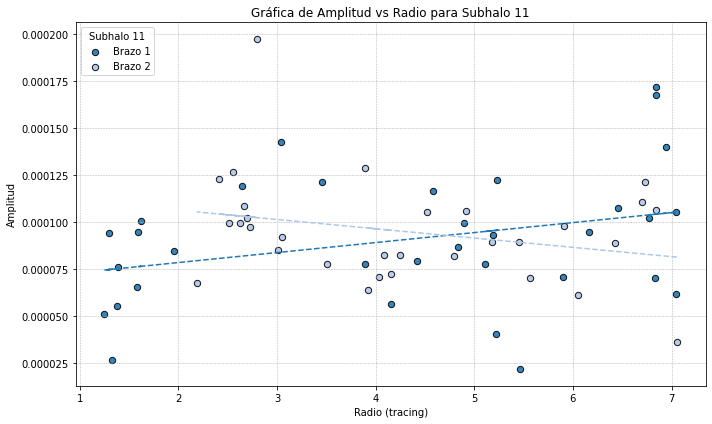

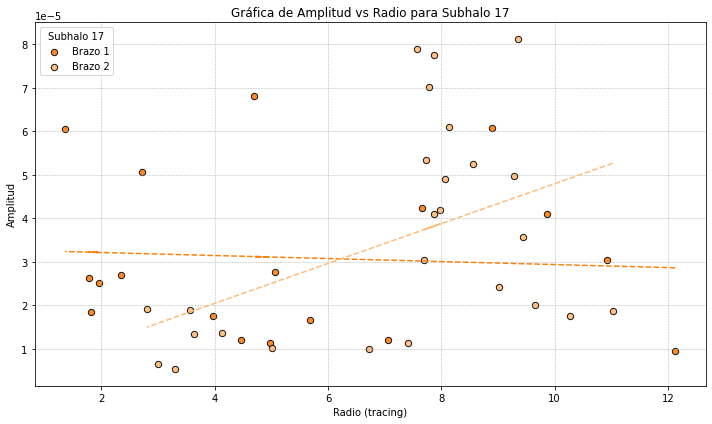

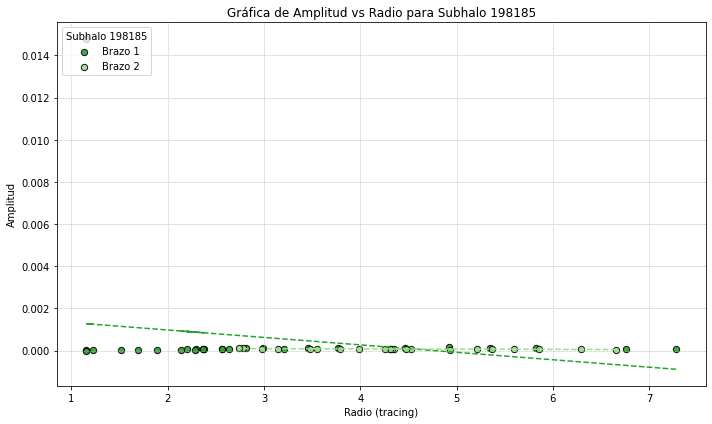

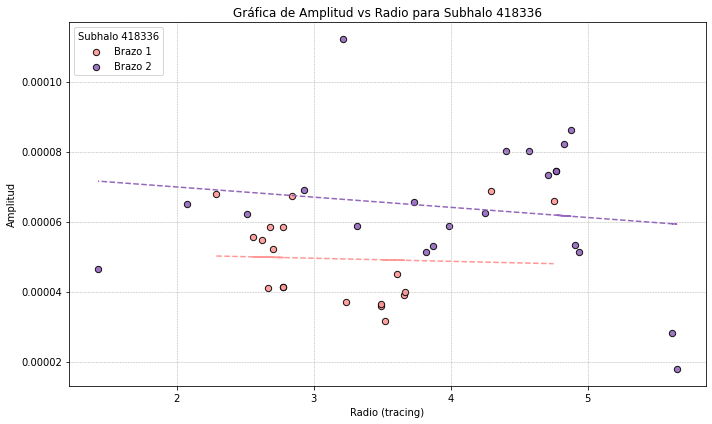

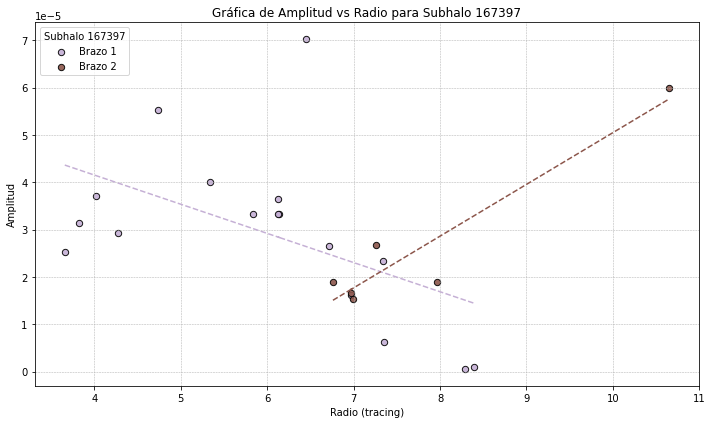

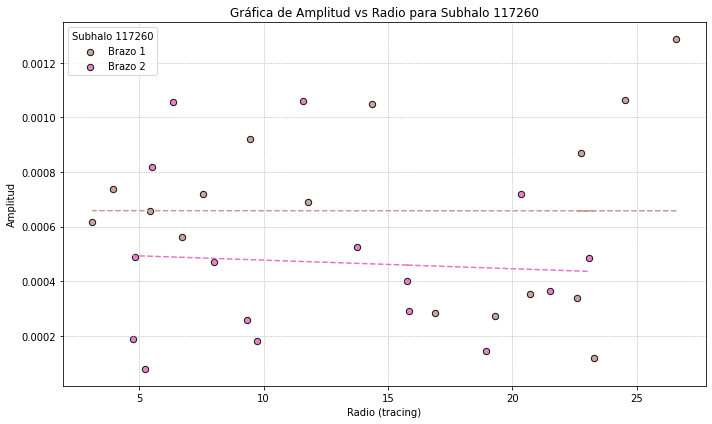

In [6]:
for i, halo_id in enumerate(halo_ids):
    halo_data = all_data[all_data['halo_id'] == halo_id].copy()
    
    color_arm1 = colors[i * 2]     
    color_arm2 = colors[i * 2 + 1] 

    plt.figure(figsize=(10, 6))

    for arm, color in zip([1, 2], [color_arm1, color_arm2]):
        arm_data = halo_data[halo_data['arm'] == arm].copy()
        arm_data['radius_tracing'] = np.sqrt(arm_data['x_tracing']**2 + arm_data['y_tracing']**2)
        
        radii_tracing = arm_data['radius_tracing'].values
        amplitudes = arm_data['amplitude'].values
        
        slope, intercept, _, _, _ = linregress(radii_tracing, amplitudes)
        
        plt.scatter(radii_tracing, amplitudes, color=color, label=f'Brazo {arm}', alpha=0.9, edgecolor='black', s=40)
        
        plt.plot(radii_tracing, intercept + slope * radii_tracing, color=color, linestyle='--')

    plt.xlabel('Radio (tracing)')
    plt.ylabel('Amplitud')
    plt.title(f'Gráfica de Amplitud vs Radio para Subhalo {halo_id}')
    plt.legend(title=f'Subhalo {halo_id}', loc='upper left')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()


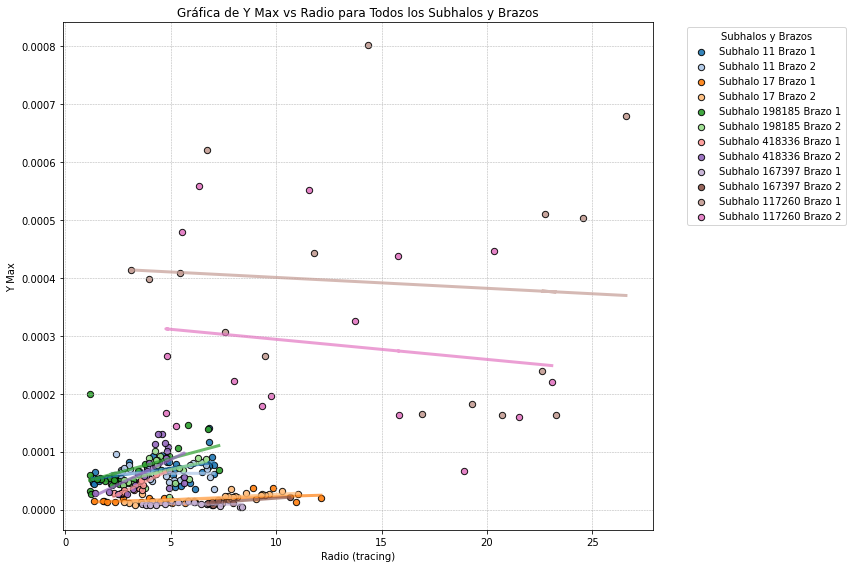

In [7]:

plt.figure(figsize=(12, 8))

for i, halo_id in enumerate(halo_ids):
    halo_data = all_data[all_data['halo_id'] == halo_id].copy()
    
    color_arm1 = colors[i * 2]     
    color_arm2 = colors[i * 2 + 1] 

    for arm, color in zip([1, 2], [color_arm1, color_arm2]):
        arm_data = halo_data[halo_data['arm'] == arm].copy()
        arm_data['radius_tracing'] = np.sqrt(arm_data['x_tracing']**2 + arm_data['y_tracing']**2)
        
        radii_tracing = arm_data['radius_tracing'].values
        y_max_values = arm_data['y_max'].values
        
        slope, intercept, _, _, _ = linregress(radii_tracing, y_max_values)
        
        plt.scatter(radii_tracing, y_max_values, color=color, label=f'Subhalo {halo_id} Brazo {arm}', alpha=0.9, edgecolor='black', s=40)
        
        plt.plot(radii_tracing, intercept + slope * radii_tracing, color=color, linestyle='-', linewidth=3, alpha=0.7)

plt.xlabel('Radio (tracing)')
plt.ylabel('Y Max')
plt.title('Gráfica de Y Max vs Radio para Todos los Subhalos y Brazos')
plt.legend(title='Subhalos y Brazos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


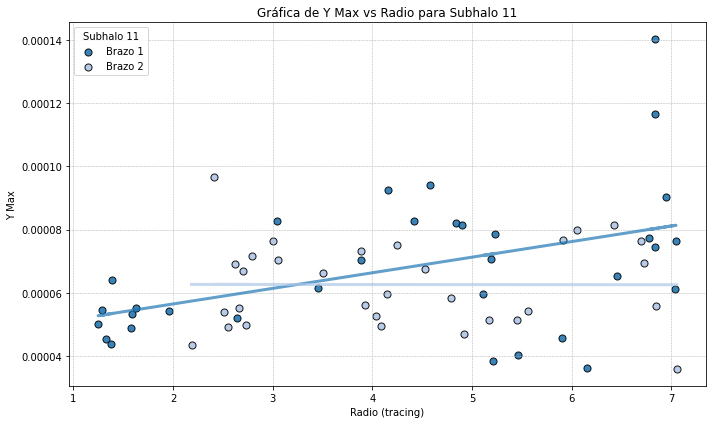

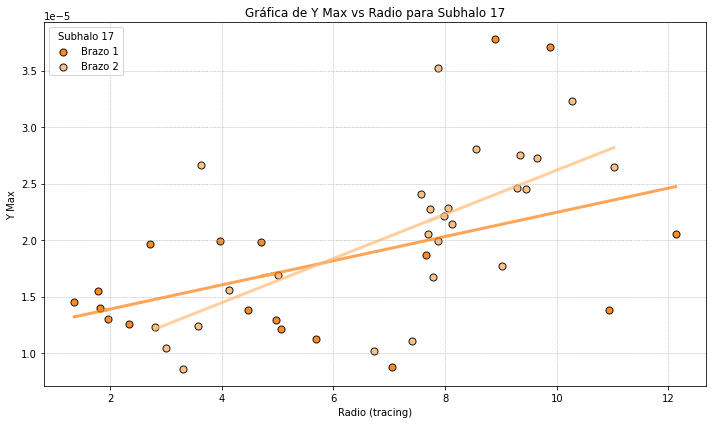

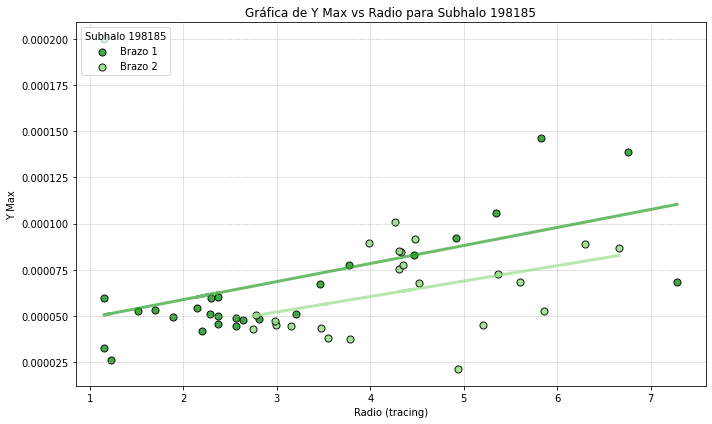

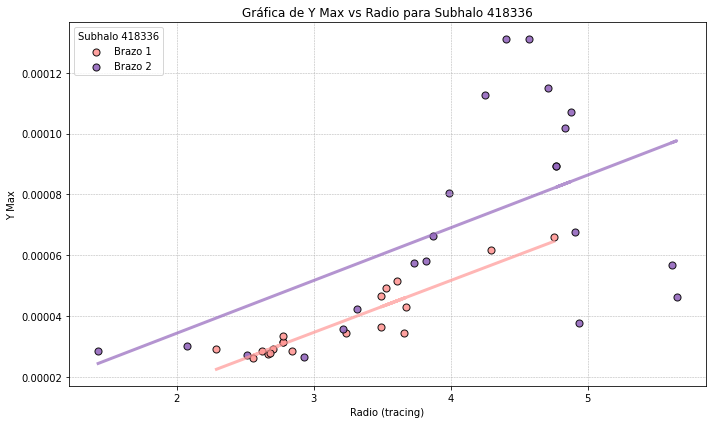

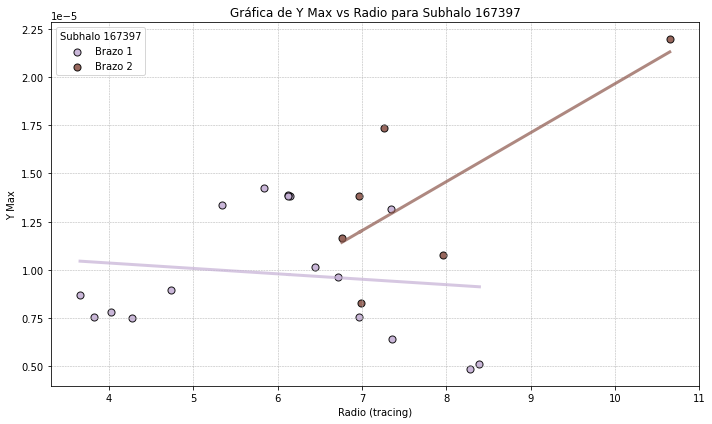

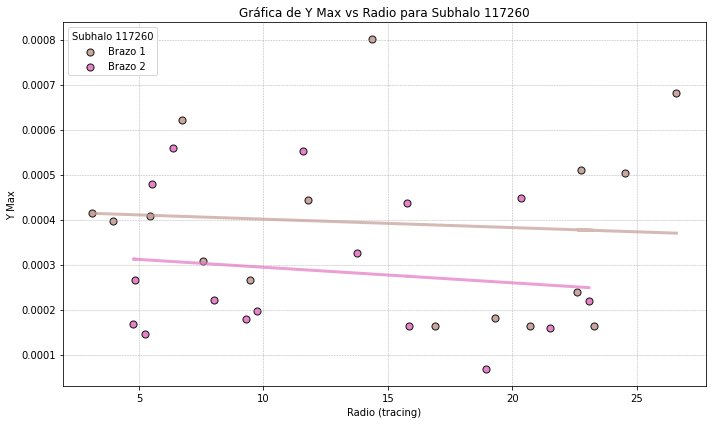

In [8]:
 for i, halo_id in enumerate(halo_ids):
    halo_data = all_data[all_data['halo_id'] == halo_id].copy()
    
    color_arm1 = colors[i * 2]     
    color_arm2 = colors[i * 2 + 1] 

    plt.figure(figsize=(10, 6))

    for arm, color in zip([1, 2], [color_arm1, color_arm2]):
        arm_data = halo_data[halo_data['arm'] == arm].copy()
        arm_data['radius_tracing'] = np.sqrt(arm_data['x_tracing']**2 + arm_data['y_tracing']**2)
        
        radii_tracing = arm_data['radius_tracing'].values
        y_max_values = arm_data['y_max'].values
        
        slope, intercept, _, _, _ = linregress(radii_tracing, y_max_values)
        
        plt.scatter(radii_tracing, y_max_values, color=color, label=f'Brazo {arm}', alpha=0.9, edgecolor='black', s=50)
        
        plt.plot(radii_tracing, intercept + slope * radii_tracing, color=color, linestyle='-' , linewidth=3, alpha=0.7)

    plt.xlabel('Radio (tracing)')
    plt.ylabel('Y Max')
    plt.title(f'Gráfica de Y Max vs Radio para Subhalo {halo_id}')
    plt.legend(title=f'Subhalo {halo_id}', loc='upper left')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()


In [9]:
# Cargar el archivo Subhalo_mass_specs.dat
mass_specs_path = '../DATA/Subhalo_mass_specs.dat'
mass_specs_columns = [
    'subhalo_id', 'subhalo_flag', 'logmass', 'logmass0', 'logmass1', 'logmass4',
    'SubhaloCM_x', 'SubhaloCM_y', 'SubhaloCM_z',
    'SubhaloVel_x', 'SubhaloVel_y', 'SubhaloVel_z',
    'SubhaloHalfmassRad', 'MassInMaxRad', 'SubhaloVmax', 'SubhaloVmaxRad'
]
mass_specs_data = pd.read_csv(mass_specs_path, delim_whitespace=True, header=None, names=mass_specs_columns)

# Ancho promedio (suma de w1 + w2) por cada brazo y subhalo
all_data['width'] = all_data['w1'] + all_data['w2']
width_avg_data = all_data.groupby(['halo_id', 'arm'])['width'].mean().reset_index()

# Combinar los datos de masa con los datos de ancho promedio
# Asociamos `halo_id` de `all_data` con `subhalo_id` en `mass_specs_data`
merged_data = pd.merge(width_avg_data, mass_specs_data, left_on='halo_id', right_on='subhalo_id')


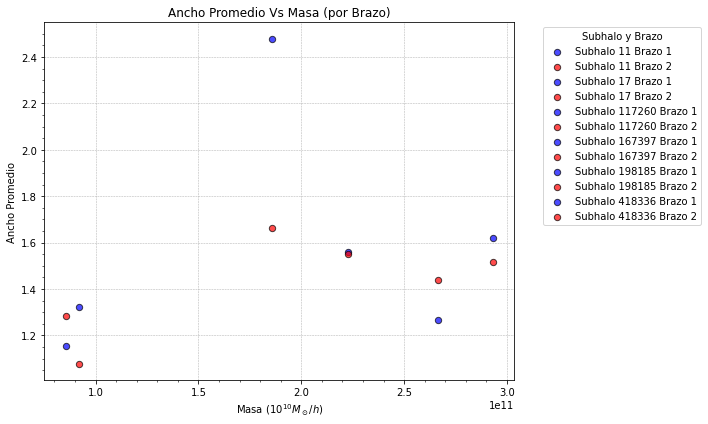

In [10]:
# Grafica masa vs ancho promedio 
plt.figure(figsize=(10, 6))

# Iterar sobre cada subhalo y graficar sus brazos
for halo_id in merged_data['halo_id'].unique():
    subhalo_data = merged_data[merged_data['halo_id'] == halo_id]
    masses = 10 ** subhalo_data['logmass'].values  # Convertir logmass a masa lineal
    widths_avg = subhalo_data['width'].values
    arms = subhalo_data['arm'].values
    
    for arm, color in zip([1, 2], ['blue', 'red']):
        arm_data = subhalo_data[subhalo_data['arm'] == arm]
        plt.scatter(
            masses[arms == arm],
            widths_avg[arms == arm],
            label=f'Subhalo {halo_id} Brazo {arm}',
            color=color,
            alpha=0.7,
            edgecolor='black',
            s=40
        )

plt.xlabel(r'Masa ($10^{10} M_\odot/h)$')
plt.ylabel('Ancho Promedio')
plt.title('Ancho Promedio Vs Masa (por Brazo)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Subhalo y Brazo')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='major', linestyle='--', linewidth=0.5)

plt.tight_layout()

plt.show()


In [11]:
# Calcular el ancho promedio por cada brazo y subhalo
all_data['width_sum'] = all_data['w1'] + all_data['w2']
width_avg_data = all_data.groupby(['halo_id', 'arm'])['width_sum'].mean().reset_index()

# Calcular el ancho promedio solo por subhalo (sin distinción de brazos)
width_avg_subhalo = all_data.groupby('halo_id')['width_sum'].mean().reset_index()

# Combinar los datos de masa con los datos de ancho promedio
merged_data = pd.merge(width_avg_data, mass_specs_data, left_on='halo_id', right_on='subhalo_id')
merged_data_avg_subhalo = pd.merge(width_avg_subhalo, mass_specs_data, left_on='halo_id', right_on='subhalo_id')


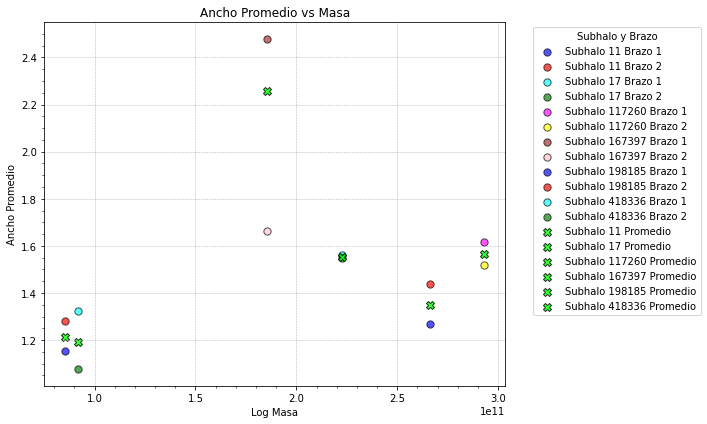

In [12]:

# Grafica masa vs ancho promedio 
plt.figure(figsize=(10, 6))  # Hacer la gráfica cuadrada

colorses = [['blue', 'red'],['cyan','green'],['magenta','yellow'],['brown','pink'],['blue', 'red'],['cyan','green']]
# Iterar sobre cada subhalo y graficar sus brazos
i_color = 0
for halo_id in merged_data['halo_id'].unique():
    subhalo_data = merged_data[merged_data['halo_id'] == halo_id]
    masses = 10 ** subhalo_data['logmass'].values  # Convertir logmass a masa lineal
    widths_avg = subhalo_data['width_sum'].values
    arms = subhalo_data['arm'].values
    
    for arm, color in zip([1, 2], colorses[i_color]):
        arm_data = subhalo_data[subhalo_data['arm'] == arm]
        plt.scatter(
            masses[arms == arm],
            widths_avg[arms == arm],
            label=f'Subhalo {halo_id} Brazo {arm}',
            color=color,
            alpha=0.67,
            edgecolor='black',
            s=53
        )
    i_color += 1

# Graficar el ancho promedio por subhalo
for i, row in merged_data_avg_subhalo.iterrows():
    mass = 10**row['logmass']  # Convertir logmass a masa lineal
    width_avg = row['width_sum']
    plt.scatter(
        mass,
        width_avg,
        color='lime',
        label=f'Subhalo {int(row["halo_id"])} Promedio',
        alpha=0.8,
        edgecolor='black',
        s=64,
        marker='X'
    )

plt.xlabel(r'Log Masa')
plt.ylabel('Ancho Promedio')
plt.title('Ancho Promedio vs Masa')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Subhalo y Brazo')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='major', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


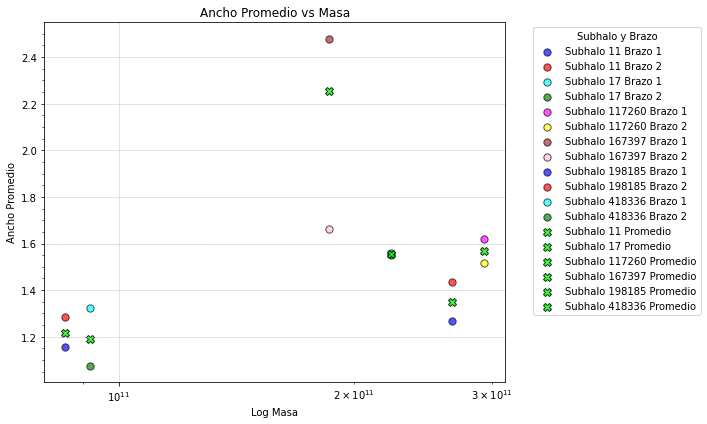

In [13]:
import matplotlib.pyplot as plt

# Grafica masa vs ancho promedio 
plt.figure(figsize=(10, 6))  # Hacer la gráfica cuadrada

colorses = [['blue', 'red'], ['cyan', 'green'], ['magenta', 'yellow'], ['brown', 'pink'],['blue', 'red'],['cyan','green']]
# Iterar sobre cada subhalo y graficar sus brazos
i_color = 0
for halo_id in merged_data['halo_id'].unique():
    subhalo_data = merged_data[merged_data['halo_id'] == halo_id]
    masses = 10 ** subhalo_data['logmass'].values  # Convertir logmass a masa lineal
    widths_avg = subhalo_data['width_sum'].values
    arms = subhalo_data['arm'].values
    
    for arm, color in zip([1, 2], colorses[i_color]):
        arm_data = subhalo_data[subhalo_data['arm'] == arm]
        plt.scatter(
            masses[arms == arm],
            widths_avg[arms == arm],
            label=f'Subhalo {halo_id} Brazo {arm}',
            color=color,
            alpha=0.67,
            edgecolor='black',
            s=53
        )
    i_color += 1

# Graficar el ancho promedio por subhalo
for i, row in merged_data_avg_subhalo.iterrows():
    mass = 10 ** row['logmass']  # Convertir logmass a masa lineal
    width_avg = row['width_sum']
    plt.scatter(
        mass,
        width_avg,
        color='lime',
        label=f'Subhalo {int(row["halo_id"])} Promedio',
        alpha=0.8,
        edgecolor='black',
        s=64,
        marker='X'
    )

# Establecer escala logarítmica en el eje x
plt.xscale('log')

plt.xlabel(r'Log Masa')
plt.ylabel('Ancho Promedio')
plt.title('Ancho Promedio vs Masa')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Subhalo y Brazo')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='major', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


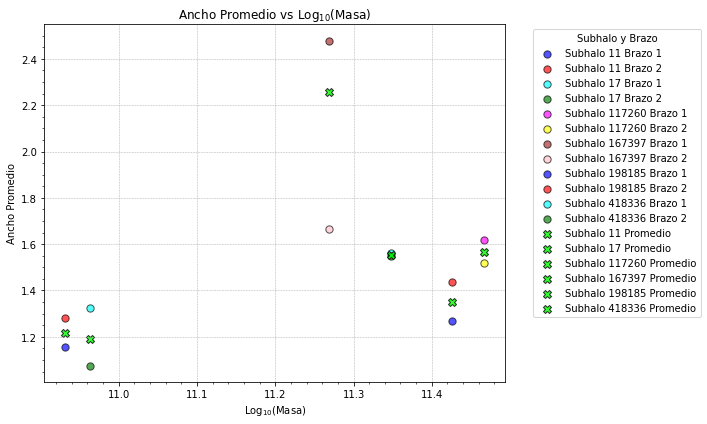

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Grafica log10(masa) vs ancho promedio 
plt.figure(figsize=(10, 6))  # Hacer la gráfica cuadrada

colorses = [['blue', 'red'], ['cyan', 'green'], ['magenta', 'yellow'], ['brown', 'pink'],['blue', 'red'],['cyan','green']]
# Iterar sobre cada subhalo y graficar sus brazos
i_color = 0
for halo_id in merged_data['halo_id'].unique():
    subhalo_data = merged_data[merged_data['halo_id'] == halo_id]
    masses_log10 = subhalo_data['logmass'].values  # Usar log10(masa) directamente
    widths_avg = subhalo_data['width_sum'].values
    arms = subhalo_data['arm'].values
    
    for arm, color in zip([1, 2], colorses[i_color]):
        arm_data = subhalo_data[subhalo_data['arm'] == arm]
        plt.scatter(
            masses_log10[arms == arm],
            widths_avg[arms == arm],
            label=f'Subhalo {halo_id} Brazo {arm}',
            color=color,
            alpha=0.67,
            edgecolor='black',
            s=53
        )
    i_color += 1

# Graficar el ancho promedio por subhalo
for i, row in merged_data_avg_subhalo.iterrows():
    mass_log10 = row['logmass']  # Usar log10(masa) directamente
    width_avg = row['width_sum']
    plt.scatter(
        mass_log10,
        width_avg,
        color='lime',
        label=f'Subhalo {int(row["halo_id"])} Promedio',
        alpha=0.8,
        edgecolor='black',
        s=64,
        marker='X'
    )

plt.xlabel(r'Log$_{10}$(Masa)')
plt.ylabel('Ancho Promedio')
plt.title('Ancho Promedio vs Log$_{10}$(Masa)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Subhalo y Brazo')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='major', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


In [15]:

# Calcular el promedio y la mediana de y_max por cada brazo y subhalo
y_max_avg_data = all_data.groupby(['halo_id', 'arm'])['y_max'].mean().reset_index()
y_max_median_data = all_data.groupby(['halo_id', 'arm'])['y_max'].median().reset_index()

# Calcular el promedio y la mediana de y_max solo por subhalo (sin distinción de brazos)
y_max_avg_subhalo = all_data.groupby('halo_id')['y_max'].mean().reset_index()
y_max_median_subhalo = all_data.groupby('halo_id')['y_max'].median().reset_index()

# Combinar los datos de masa con los datos de y_max promedio y mediana
merged_data_avg = pd.merge(y_max_avg_data, mass_specs_data, left_on='halo_id', right_on='subhalo_id')
merged_data_median = pd.merge(y_max_median_data, mass_specs_data, left_on='halo_id', right_on='subhalo_id')


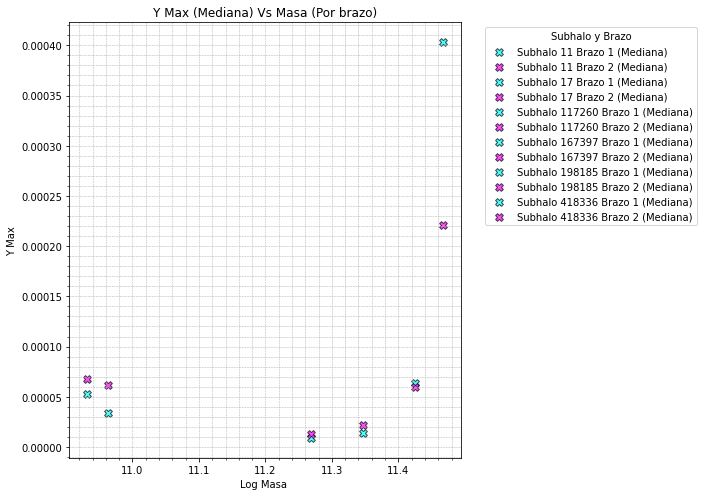

In [16]:
# Graficar masa vs y_max promedio y mediana
plt.figure(figsize=(10, 7))  # Hacer la gráfica cuadrada


# Graficar mediana
for halo_id in merged_data_median['halo_id'].unique():
    subhalo_data = merged_data_median[merged_data_median['halo_id'] == halo_id]
    masses =  subhalo_data['logmass'].values  # Convertir logmass a masa lineal
    y_max_median = subhalo_data['y_max'].values
    arms = subhalo_data['arm'].values
    
    for arm, color in zip([1, 2], ['cyan', 'magenta']):
        arm_data = subhalo_data[subhalo_data['arm'] == arm]
        plt.scatter(
            masses[arms == arm],
            y_max_median[arms == arm],
            label=f'Subhalo {halo_id} Brazo {arm} (Mediana)',
            color=color,
            alpha=0.7,
            edgecolor='black',
            s=60,
            marker='X'
        )
plt.xlabel(r'Log Masa ')
plt.ylabel('Y Max')
plt.title('Y Max (Mediana) Vs Masa (Por brazo)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Subhalo y Brazo')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


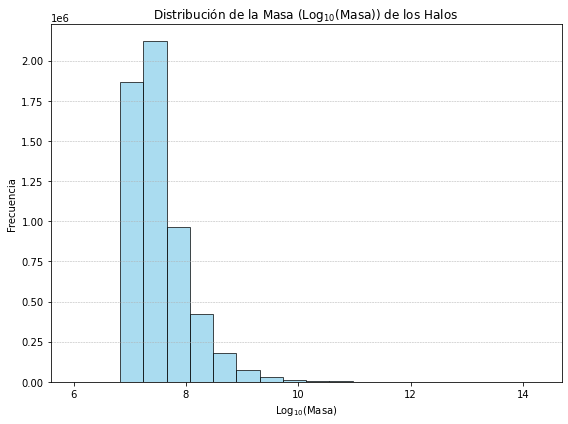

IDs de halos con log10(masa) entre 11.05 y 11.3: [18, 20, 22, 23, 24, 28, 29, 63873, 63875, 63876, 63879, 63881, 96767, 96768, 96770, 96775, 96778, 117262, 117268, 117269, 117270, 117271, 117273, 143889, 143891, 143894, 167401, 167402, 167403, 167404, 167406, 184937, 184940, 184942, 198184, 208814, 208815, 220600, 220602, 220603, 242794, 253867, 264888, 264890, 282781, 289386, 289387, 289389, 300906, 307489, 313694, 313695, 319732, 319733, 329509, 329510, 338447, 348904, 360924, 366408, 383977, 386272, 388545, 435753, 446668, 446669, 452980, 458471, 460723, 460724, 460725, 464164, 467416, 471997, 480804, 494710, 496789, 507295, 514273, 518121, 520312, 525534, 526880, 527840, 529856, 533061, 539668, 548152, 560422, 564269, 568304, 574287, 586837, 590013, 596401, 605483, 608229, 608529, 613553, 613809, 621978, 628814, 628815, 632805, 635613, 635614, 649528, 650101, 651449, 653355, 656313, 656611, 656970, 659710, 660654, 661260, 662366, 665259, 666243, 666340, 667084, 668713, 668804, 6689

In [21]:
import matplotlib.pyplot as plt

# Extraer los valores de logmass
logmass_values = mass_specs_data['logmass']

# Graficar el histograma de logmass (frecuencia en log10 de la masa)
plt.figure(figsize=(8, 6))
plt.hist(logmass_values, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Log$_{10}$(Masa)')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Masa (Log$_{10}$(Masa)) de los Halos')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Buscar los halo_id que cumplen con los criterios especificados
halos_between_11_05_and_11_3 = mass_specs_data[(mass_specs_data['logmass'] >= 11.05) & (mass_specs_data['logmass'] <= 11.23)]['subhalo_id'].tolist()
halos_greater_than_11_5 = mass_specs_data[mass_specs_data['logmass'] > 11.5]['subhalo_id'].tolist()

# Mostrar los resultados
print("IDs de halos con log10(masa) entre 11.05 y 11.3:", halos_between_11_05_and_11_3)
print("IDs de halos con log10(masa) mayores a 11.5:", halos_greater_than_11_5)


In [18]:

# Calcular el promedio y la mediana de y_max y y_max / 2 por subhalo
all_data['y_max_half'] = all_data['y_max'] / 2
y_max_avg_subhalo = all_data.groupby('halo_id')['y_max'].mean().reset_index()
y_max_median_subhalo = all_data.groupby('halo_id')['y_max'].median().reset_index()
y_max_half_avg_subhalo = all_data.groupby('halo_id')['y_max_half'].mean().reset_index()
y_max_half_median_subhalo = all_data.groupby('halo_id')['y_max_half'].median().reset_index()

# Combinar los datos de masa con los datos de y_max y y_max / 2 (promedio y mediana)
merged_data_avg = pd.merge(y_max_avg_subhalo, mass_specs_data, left_on='halo_id', right_on='subhalo_id')
merged_data_median = pd.merge(y_max_median_subhalo, mass_specs_data, left_on='halo_id', right_on='subhalo_id')
merged_data_half_avg = pd.merge(y_max_half_avg_subhalo, mass_specs_data, left_on='halo_id', right_on='subhalo_id')
merged_data_half_median = pd.merge(y_max_half_median_subhalo, mass_specs_data, left_on='halo_id', right_on='subhalo_id')

# Colores para cada subhalo
subhalo_ids = mass_specs_data['subhalo_id'].unique()
color_palette = cm.get_cmap('tab10', len(subhalo_ids))  # Usar un mapa de color para colores distintos

# Graficar masa vs y_max promedio, mediana, y y_max / 2 (promedio y mediana)
plt.figure(figsize=(10, 10))  # Hacer la gráfica cuadrada

# Crear un diccionario para los colores de cada subhalo usando el color_palette
color_map = {subhalo_id: color_palette(i) for i, subhalo_id in enumerate(subhalo_ids)}

# Graficar y_max promedio
for i, row in merged_data_avg.iterrows():
    mass = 10 ** row['logmass']  # Convertir logmass a masa lineal
    y_max_avg = row['y_max']
    color = color_map[row['subhalo_id']]
    plt.scatter(
        mass,
        y_max_avg,
        color=color,
        label=f'Subhalo {int(row["subhalo_id"])} - Y Max Promedio',
        alpha=0.7,
        edgecolor='black',
        s=40,
        marker='o'
    )

# Graficar y_max mediana
for i, row in merged_data_median.iterrows():
    mass = 10 ** row['logmass']  # Convertir logmass a masa lineal
    y_max_median = row['y_max']
    color = color_map[row['subhalo_id']]
    plt.scatter(
        mass,
        y_max_median,
        color=color,
        label=f'Subhalo {int(row["subhalo_id"])} - Y Max Mediana',
        alpha=0.7,
        edgecolor='black',
        s=60,
        marker='X'
    )

# Graficar y_max / 2 promedio
for i, row in merged_data_half_avg.iterrows():
    mass = 10 ** row['logmass']  # Convertir logmass a masa lineal
    y_max_half_avg = row['y_max_half']
    color = color_map[row['subhalo_id']]
    plt.scatter(
        mass,
        y_max_half_avg,
        color=color,
        label=f'Subhalo {int(row["subhalo_id"])} - Y Max / 2 Promedio',
        alpha=0.7,
        edgecolor='black',
        s=40,
        marker='s'
    )

# Graficar y_max / 2 mediana
for i, row in merged_data_half_median.iterrows():
    mass = 10 ** row['logmass']  # Convertir logmass a masa lineal
    y_max_half_median = row['y_max_half']
    color = color_map[row['subhalo_id']]
    plt.scatter(
        mass,
        y_max_half_median,
        color=color,
        label=f'Subhalo {int(row["subhalo_id"])} - Y Max / 2 Mediana',
        alpha=0.7,
        edgecolor='black',
        s=60,
        marker='D'
    )

plt.xlabel(r'Masa ($10^{10} M_\odot/h)$')
plt.ylabel('Y Max y Y Max / 2')
plt.title('Relación entre Masa de Subhalo y Y Max (Promedio y Mediana)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Subhalo y Brazo')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()



KeyboardInterrupt: 

<Figure size 720x720 with 0 Axes>

In [ ]:
# Grafica masa vs y_max promedio
plt.figure(figsize=(10, 10))  # Hacer la gráfica cuadrada

for halo_id in merged_data['halo_id'].unique():
    subhalo_data = merged_data[merged_data['halo_id'] == halo_id]
    masses = 10 ** subhalo_data['logmass'].values  
    y_max_avg = subhalo_data['y_max'].values
    arms = subhalo_data['arm'].values
    
    for arm, color in zip([1, 2], ['blue', 'red']):
        arm_data = subhalo_data[subhalo_data['arm'] == arm]
        plt.scatter(
            masses[arms == arm],
            y_max_avg[arms == arm],
            label=f'Subhalo {halo_id} Brazo {arm}',
            color=color,
            alpha=0.7,
            edgecolor='black',
            s=40
        )

for i, row in merged_data_avg_subhalo.iterrows():
    mass = 10 ** row['logmass']  
    y_max_avg = row['y_max']
    plt.scatter(
        mass,
        y_max_avg,
        color='green',
        label=f'Subhalo {int(row["halo_id"])} Promedio',
        alpha=0.8,
        edgecolor='black',
        s=60,
        marker='X'
    )

for i, row in merged_data_median_subhalo.iterrows():
    mass = 10 ** row['logmass']  
    y_max_avg = row['y_max']
    plt.scatter(
        mass,
        y_max_avg,
        color='green',
        label=f'Subhalo {int(row["halo_id"])} Promedio',
        alpha=0.8,
        edgecolor='black',
        s=60,
        marker='X'
    )
plt.xlabel(r'Masa ($10^{10} M_\odot/h)$')
plt.ylabel('Y Max Promedio')
plt.title('Relación entre Masa de Subhalo y Y Max Promedio por Brazo y Subhalo Total')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Subhalo y Brazo')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

In [ ]:
# Calcular el promedio de y_max / 2 por cada brazo y subhalo
all_data['y_max_half'] = all_data['y_max'] / 2
y_max_half_avg_data = all_data.groupby(['halo_id', 'arm'])['y_max_half'].mean().reset_index()

# Calcular el promedio de y_max / 2 solo por subhalo (sin distinción de brazos)
y_max_half_avg_subhalo = all_data.groupby('halo_id')['y_max_half'].mean().reset_index()

# Combinar los datos de masa con los datos de y_max / 2 promedio
merged_data = pd.merge(y_max_half_avg_data, mass_specs_data, left_on='halo_id', right_on='subhalo_id')
merged_data_avg_subhalo = pd.merge(y_max_half_avg_subhalo, mass_specs_data, left_on='halo_id', right_on='subhalo_id')

# Grafica masa vs y_max / 2 promedio
plt.figure(figsize=(10, 10))  # Hacer la gráfica cuadrada

for halo_id in merged_data['halo_id'].unique():
    subhalo_data = merged_data[merged_data['halo_id'] == halo_id]
    masses = 10 ** subhalo_data['logmass'].values  # Convertir logmass a masa lineal
    y_max_half_avg = subhalo_data['y_max_half'].values
    arms = subhalo_data['arm'].values
    
    for arm, color in zip([1, 2], ['blue', 'red']):
        arm_data = subhalo_data[subhalo_data['arm'] == arm]
        plt.scatter(
            masses[arms == arm],
            y_max_half_avg[arms == arm],
            label=f'Subhalo {halo_id} Brazo {arm}',
            color=color,
            alpha=0.7,
            edgecolor='black',
            s=40
        )

for i, row in merged_data_avg_subhalo.iterrows():
    mass = 10 ** row['logmass']  # Convertir logmass a masa lineal
    y_max_half_avg = row['y_max_half']
    plt.scatter(
        mass,
        y_max_half_avg,
        color='green',
        label=f'Subhalo {int(row["halo_id"])} Promedio',
        alpha=0.8,
        edgecolor='black',
        s=60,
        marker='X'
    )

plt.xlabel(r'Masa ($10^{10} M_\odot/h)$')
plt.ylabel('Y Max / 2 Promedio')
plt.title('Relación entre Masa de Subhalo y Y Max / 2 Promedio por Brazo y Subhalo Total')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Subhalo y Brazo')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()
